# DIGIT RECOGNIZER USING MACHINE LEARNING

Team Members:

B.Kranthi Kiran (16311A05Q4)

K.Sashi Preetham (16311A05T8)

### Importing all the required libraries for our model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
IMG_HEIGHT=28
IMG_WIDTH=28

%matplotlib inline

### Loading the dataset 

In [2]:
loaded_images = pd.read_csv('data/train.csv')
loaded_images.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Labeling the images 

In [3]:
images=loaded_images.iloc[:,1:]
labels=loaded_images.iloc[:,:1]   # for the labels to be a dataframe . iloc[:,0] returns a Series  iloc[:,:1] returns a Dataframe
labels.head()

,label
0,1
1,0
2,1
3,4
4,0


### Splitting the dataset into train data and test data

In [4]:
train_images,test_images,train_labels,test_labels=train_test_split(images,labels,test_size=0.2,random_state=13)

In [5]:
train_images.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,...,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.0,33600.0,33600.0,33600.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.217321,0.115327,0.056161,0.024405,0.016964,0.003571,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.336594,4.529554,3.279590,1.964475,1.944391,0.463160,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Using decision tree classifier and building our model

In [6]:
tree=DecisionTreeClassifier(criterion='gini',random_state=1)
tree.fit(train_images,train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Prediction score of the training data

In [7]:
tree.score(train_images,train_labels.values.ravel())

1.0

### Prediction of the testing data

In [8]:
tree.score(test_images,test_labels.values.ravel())

0.854047619047619

### Plotting the data

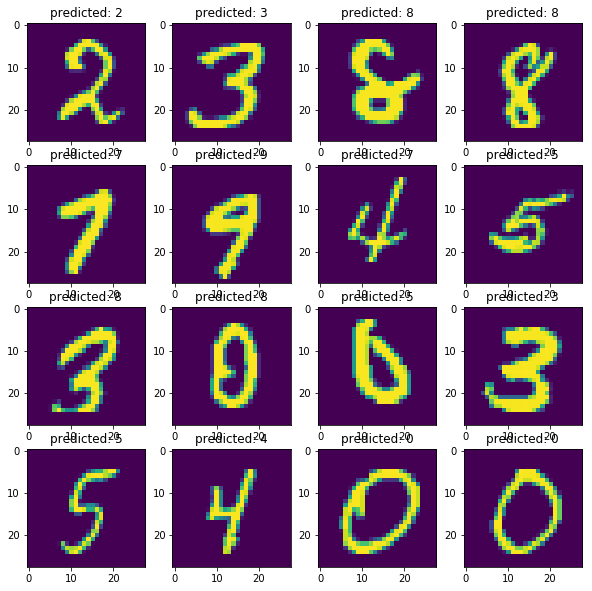

In [17]:
figr,axes=plt.subplots(figsize=(10,10),ncols=4,nrows=4)
axes=axes.flatten()
for i in range(0,16):
    jj=np.random.randint(0,test_images.shape[0])          #pick a random image
    axes[i].imshow(test_images.iloc[[jj]].values.reshape(IMG_HEIGHT,IMG_WIDTH))
    axes[i].set_title('predicted: '+str(tree.predict(test_images.iloc[[jj]])[0]))

In [10]:
new_data=pd.read_csv('data/test.csv')
new_data.head(n=3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_pred=tree.predict(new_data)

In [12]:
y_pred.shape

(28000,)

In [13]:
submissions=pd.DataFrame({"ImageId":list(range(1,len(y_pred)+1)), "Label":y_pred})
submissions.head()

,ImageId,Label
0,1,2
1,2,2
2,3,9
3,4,9
4,5,8


### Storing the values of the test data in csv file

In [14]:
submissions.to_csv("digit_recognizer_output.csv",index=False,header=True)